# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import sklearn
import os

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/Othercomputers/My Mac/Data Science/Projects/2nd week/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [7]:
df.sample(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
10252,9:20:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Public (12 seats),Owner,NaN,...,Turnover,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
1878,10:34:00,Sunday,31-50,Male,Junior high school,Employee,5-10yr,Taxi,Owner,2-5yrs,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
6595,7:10:00,Tuesday,Over 51,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [8]:
df.head

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


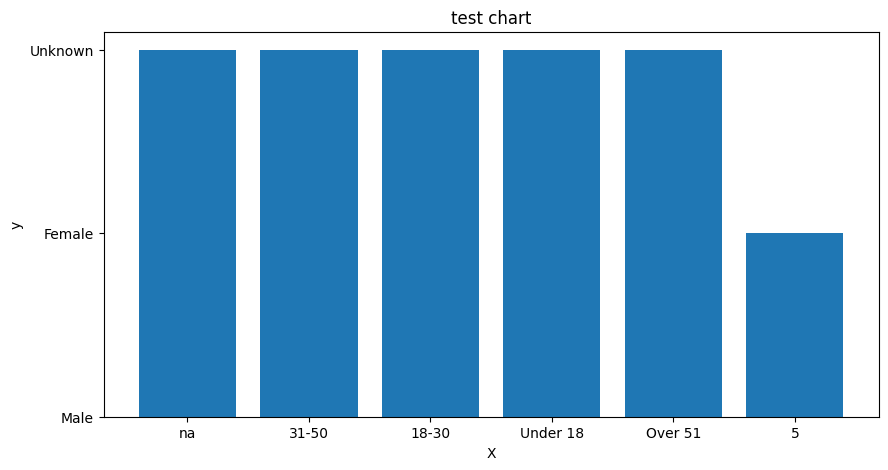

In [13]:
plt.figure(figsize=(10,5))
plt.bar(df['Age_band_of_casualty'],df['Sex_of_driver'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('test chart')
plt.show()

In [39]:
print('Max Number of casualties:' ,df['Number_of_casualties'].max())
print('Number of vehicles involved:',df['Number_of_vehicles_involved'].max())

Max Number of casualties: 8
Number of vehicles involved: 7


In [14]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [25]:
test_time = pd.to_timedelta(df['Time'])
test_time.sample()

,Time
4343,0 days 14:17:00


In [16]:
df['Time'] = pd.to_timedelta(df['Time'])

df.sample(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1877,0 days 18:45:00,Saturday,18-30,Male,High school,Owner,5-10yr,NaN,Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
11240,0 days 10:35:00,Wednesday,Under 18,Male,Junior high school,Employee,5-10yr,Long lorry,Owner,Above 10yr,...,Going straight,Driver or rider,Female,18-30,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
7685,0 days 15:15:00,Tuesday,31-50,Male,Above high school,Employee,Above 10yr,NaN,Owner,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury


In [17]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [18]:
df['Educational_level'].mode()

,Educational_level
0,Junior high school


In [20]:
df['Educational_level'].value_counts()

,count
Educational_level,
Junior high school,7619
Elementary school,2163
High school,1110
Above high school,362
Writing & reading,176
Unknown,100
Illiterate,45


In [23]:
df['Educational_level'] = df['Educational_level'].fillna('Unknown')

In [24]:
df['Educational_level'].value_counts()

,count
Educational_level,
Junior high school,7619
Elementary school,2163
High school,1110
Unknown,841
Above high school,362
Writing & reading,176
Illiterate,45


In [26]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [27]:
df['Vehicle_driver_relation'].value_counts()

,count
Vehicle_driver_relation,
Employee,9627
Owner,1973
Other,123
Unknown,14


In [28]:
df['Vehicle_driver_relation'].isna().sum()

579

In [29]:
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna('Unknown')

In [30]:
df['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [31]:
df['Driving_experience'].mode()

,Driving_experience
0,5-10yr


In [32]:
df['Driving_experience'] = df['Driving_experience'].fillna(df['Driving_experience'].mode()[0])

In [33]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [34]:
df['Type_of_vehicle'].value_counts()

,count
Type_of_vehicle,
Automobile,3205
Lorry (41?100Q),2186
Other,1208
Pick up upto 10Q,811
Public (12 seats),711
Stationwagen,687
Lorry (11?40Q),541
Public (13?45 seats),532
Public (> 45 seats),404


In [35]:
df = df.drop('Service_year_of_vehicle', axis=1)
df = df.drop('Defect_of_vehicle',axis=1)

In [40]:
df = df.drop('Work_of_casuality', axis=1)
df = df.drop('Fitness_of_casuality',axis=1)

In [41]:
df.dropna(subset=['Type_of_collision'],inplace=True)
df.dropna(subset=['Road_allignment'],inplace=True)
df.dropna(subset=['Road_surface_type'],inplace=True)

In [42]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,909
Owner_of_vehicle,423
Area_accident_occured,216


In [43]:
df['Owner_of_vehicle'].value_counts()

,count
Owner_of_vehicle,
Owner,10105
Governmental,995
Organization,308
Other,22


In [44]:
df['Area_accident_occured'].value_counts()

,count
Area_accident_occured,
Other,3702
Office areas,3347
Residential areas,1968
Church areas,1028
Industrial areas,421
School areas,404
Recreational areas,296
Outside rural areas,215
Hospital areas,109


In [45]:
df['Lanes_or_Medians'].value_counts()

,count
Lanes_or_Medians,
Two-way (divided with broken lines road marking),4236
Undivided Two way,3688
other,1584
Double carriageway (median),1000
One way,800
Two-way (divided with solid lines road marking),139
Unknown,54


In [46]:
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0])

In [47]:
df.dropna(subset=['Area_accident_occured'], inplace=True)
df.dropna(subset=['Lanes_or_Medians'], inplace=True)

In [48]:
df['Types_of_Junction'].value_counts()

,count
Types_of_Junction,
Y Shape,4182
No junction,3536
Crossing,1991
Other,400
Unknown,182
O Shape,150
T Shape,54
X Shape,12


In [50]:
df.dropna(subset=['Types_of_Junction'], inplace=True)

In [49]:
df['Vehicle_movement'].value_counts()

,count
Vehicle_movement,
Going straight,7488
Moving Backward,894
Other,847
Reversing,536
Turnover,455
Getting off,314
Entering a junction,181
Overtaking,92
Unknown,79


In [51]:
df['Vehicle_movement'] = df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0])

In [52]:
df['Type_of_vehicle'].isna().sum()

784

In [53]:
df['Type_of_vehicle'].value_counts()

,count
Type_of_vehicle,
Automobile,2736
Lorry (41?100Q),1853
Other,1031
Pick up upto 10Q,705
Public (12 seats),605
Stationwagen,573
Public (13?45 seats),468
Lorry (11?40Q),462
Public (> 45 seats),348


In [54]:
df.dropna(subset=['Type_of_vehicle'], inplace=True)

In [55]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9723 entries, 1 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   Time                         9723 non-null   timedelta64[ns]
 1   Day_of_week                  9723 non-null   object         
 2   Age_band_of_driver           9723 non-null   object         
 3   Sex_of_driver                9723 non-null   object         
 4   Educational_level            9723 non-null   object         
 5   Vehicle_driver_relation      9723 non-null   object         
 6   Driving_experience           9723 non-null   object         
 7   Type_of_vehicle              9723 non-null   object         
 8   Owner_of_vehicle             9723 non-null   object         
 9   Area_accident_occured        9723 non-null   object         
 10  Lanes_or_Medians             9723 non-null   object         
 11  Road_allignment              9723 

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Number_of_vehicles_involved']] = scaler.fit_transform(df[['Number_of_vehicles_involved']])

scaler

MinMaxScaler()

In [70]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

df[['Number_of_vehicles_involved','Number_of_casualties']] = norm.fit_transform(df[['Number_of_vehicles_involved','Number_of_casualties']])

norm

Normalizer()

In [72]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
df.rename(columns={})

In [75]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df[['Owner_of_vehicle']] = label_encoder.fit_transform(df['Owner_of_vehicle'])

label_encoder

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Columns must be same length as key

In [76]:
from sklearn.preprocessing import OneHotEncoder

#ohe = OneHotEncoder()

test_ohe = pd.get_dummies(df['Day_of_week'])

test_ohe.sample()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
9869,False,False,False,True,False,False,False


In [71]:
df.sample(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
9118,0 days 15:00:00,Thursday,Over 51,Male,Junior high school,Employee,Above 10yr,Long lorry,Owner,Office areas,...,0.164399,0.986394,Going straight,na,na,na,na,Not a Pedestrian,No priority to vehicle,Slight Injury
9690,0 days 07:40:00,Monday,18-30,Male,Junior high school,Employee,Above 10yr,Other,Owner,Recreational areas,...,0.164399,0.986394,Stopping,na,na,na,na,Not a Pedestrian,Changing lane to the left,Serious Injury
11889,0 days 18:45:00,Tuesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Residential areas,...,0.316228,0.948683,Going straight,na,na,na,na,Not a Pedestrian,No priority to pedestrian,Slight Injury


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [89]:
numerical_values = df[['Number_of_casualties','Number_of_vehicles_involved']]

corr_matric = numerical_values.corr()

corr_matric

,Number_of_casualties,Number_of_vehicles_involved
Number_of_casualties,1.000000,-0.863506
Number_of_vehicles_involved,-0.863506,1.000000


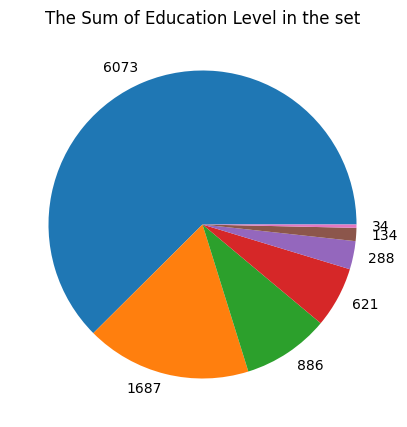

In [90]:
test_viz = df['Educational_level'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(test_viz , labels=test_viz)
plt.title('The Sum of Education Level in the set')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import  LinearRegression

label_data_enco = LabelEncoder()

df['Age_band_of_driver_encod'] = label_data_enco.fit_transform(df[['Age_band_of_driver']])

X = df['Age_band_of_driver_encod']

y= df['Number_of_casualties']

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , y , train_size=0.3)

In [94]:
lin_reg = LinearRegression()

In [95]:
lin_reg.fit(x_train, y_train)

print(lin_reg.intercept_)

print(lin_reg.coef_)

ValueError: Expected 2D array, got 1D array instead:
array=[4 1 2 ... 1 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

mae = mean_absolute_error(y_train , y_pred)

mse = mean_squared_error(y_train, y_pred)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

#### Decision Tree Classifier

#### Support Vector Machine (SVM)

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: